In [1]:
'''
海伦使用约会网站寻找约会对象。经过一段时间之后，她发现曾交往过三种类型的人: 不喜欢的人 魅力一般的人 * 极具魅力的人
她希望： 1. 工作日与魅力一般的人约会 2. 周末与极具魅力的人约会 3. 不喜欢的人则直接排除掉
现在她收集到了一些约会网站未曾记录的数据信息，这更有助于匹配对象的归类。

datingTestSet2.txt
海伦把这些约会对象的数据存放在文本文件 datingTestSet2.txt 中，总共有 1000 行。海伦约会的对象主要包含以下 3 种特征：
每年获得的飞行常客里程数
玩视频游戏所耗时间百分比
每周消费的冰淇淋公升数
文本文件数据格式如下：
40920   8.326976    0.953952    3
14488   7.153469    1.673904    2
26052   1.441871    0.805124    1
75136   13.147394   0.428964    1
38344   1.669788    0.134296    1 
'''

'\n\xe6\xb5\xb7\xe4\xbc\xa6\xe4\xbd\xbf\xe7\x94\xa8\xe7\xba\xa6\xe4\xbc\x9a\xe7\xbd\x91\xe7\xab\x99\xe5\xaf\xbb\xe6\x89\xbe\xe7\xba\xa6\xe4\xbc\x9a\xe5\xaf\xb9\xe8\xb1\xa1\xe3\x80\x82\xe7\xbb\x8f\xe8\xbf\x87\xe4\xb8\x80\xe6\xae\xb5\xe6\x97\xb6\xe9\x97\xb4\xe4\xb9\x8b\xe5\x90\x8e\xef\xbc\x8c\xe5\xa5\xb9\xe5\x8f\x91\xe7\x8e\xb0\xe6\x9b\xbe\xe4\xba\xa4\xe5\xbe\x80\xe8\xbf\x87\xe4\xb8\x89\xe7\xa7\x8d\xe7\xb1\xbb\xe5\x9e\x8b\xe7\x9a\x84\xe4\xba\xba: \xe4\xb8\x8d\xe5\x96\x9c\xe6\xac\xa2\xe7\x9a\x84\xe4\xba\xba \xe9\xad\x85\xe5\x8a\x9b\xe4\xb8\x80\xe8\x88\xac\xe7\x9a\x84\xe4\xba\xba * \xe6\x9e\x81\xe5\x85\xb7\xe9\xad\x85\xe5\x8a\x9b\xe7\x9a\x84\xe4\xba\xba\n\xe5\xa5\xb9\xe5\xb8\x8c\xe6\x9c\x9b\xef\xbc\x9a 1. \xe5\xb7\xa5\xe4\xbd\x9c\xe6\x97\xa5\xe4\xb8\x8e\xe9\xad\x85\xe5\x8a\x9b\xe4\xb8\x80\xe8\x88\xac\xe7\x9a\x84\xe4\xba\xba\xe7\xba\xa6\xe4\xbc\x9a 2. \xe5\x91\xa8\xe6\x9c\xab\xe4\xb8\x8e\xe6\x9e\x81\xe5\x85\xb7\xe9\xad\x85\xe5\x8a\x9b\xe7\x9a\x84\xe4\xba\xba\xe7\xba\xa6\xe4\xbc\x9a 3. \xe4\

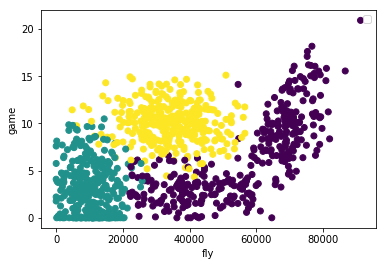

In [66]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0], dataMat[:, 1], c=15.0*array(dataLabel))
plt.xlabel("fly")
plt.ylabel("game")
ax.legend()
plt.show()

In [72]:
# 归一化
def autoNorm(dataSet):
    """
    Desc:
        归一化特征值，消除特征之间量级不同导致的影响
    parameter:
        dataSet: 数据集
    return:
        归一化后的数据集 normDataSet. ranges和minVals即最小值与范围，并没有用到
    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    n = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (n, 1)) #minVals.n*n, minVals.m*1
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (n, 1))
    return normDataSet, e, minVals

[[0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 ...
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]]



In [95]:
import operator
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #距离度量 度量公式为欧氏距离
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5

    #将距离排序：从小到大
    sortedDistIndicies = distances.argsort()
    #选取前K个最短距离， 选取这K个中最多的分类类别
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [97]:
resultList = ['not at all', 'in small doses', 'in large doses']
ffMiles = float(raw_input("frequent filer miles earned per year?"))
percentTats = float(raw_input("percentage of time spent playing video games ?"))
iceCream = float(raw_input("liters of ice cream consumed per year?"))

frequent filer miles earned per year?40920
percentage of time spent playing video games ?8.326976
liters of ice cream consumed per year?0.953952


In [98]:
from numpy import *
filename = "datingTestSet2.txt"
fr = open(filename)
lines = fr.readlines()
numOfLines = len(lines)
# 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
dataMat = zeros((numOfLines, 3))  # prepare matrix to return
dataLabel = []  # prepare labels return
index = 0
testLabel = []
for line in lines:
    # str.strip([chars]) --返回已移除字符串头尾指定字符所生成的新字符串
    line = line.strip()
    # 以 '\t' 切割字符串
    listFromLine = line.split('\t')
    # 每列的属性数据
    dataMat[index, :] = listFromLine[0:3]
    # 每列的类别数据，就是 label 标签数据
    dataLabel.append(int(listFromLine[-1]))
    testLabel.append(2)
    index += 1

# 返回数据矩阵returnMat和对应的类别classLabelVector

In [99]:
#dataMat, dataLabel
normMat, ranges, minVals = autoNorm(dataMat)
inArr = array([ffMiles, percentTats, iceCream])
classifierResult = classify0((inArr-minVals)/ranges,normMat,dataLabel, 3)
print "You will probably like this person: ", resultList[classifierResult - 1]

[[0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 ...
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]]
You will probably like this person:  in large doses


In [100]:
ffMiles

40920.0